<a href="https://colab.research.google.com/github/tigerak/1st_practice/blob/main/M8_%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 군집화(Clustering)

- 대표적인 비지도 학습
- 레이블이 없는 데이터를 그룹화하는 알고리즘

In [167]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster
from sklearn import mixture
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [117]:
def plot_data(dataset, position, title):
    X, y = dataset
    plt.subplot(position)
    plt.title(title)
    plt.scatter(X[:, 0], X[:, 1])

In [118]:
np.random.seed(0)
n_samples = 1500
random_state = 0
noise = 0.05

In [119]:
circles = datasets.make_circles(n_samples=n_samples, factor=0.5,
                                noise=noise, random_state=random_state)
moons = datasets.make_moons(n_samples=n_samples,
                                noise=noise, random_state=random_state)
blobs = datasets.make_blobs(n_samples=n_samples,
                                random_state=random_state)
no_structures = np.random.rand(n_samples, 2), None

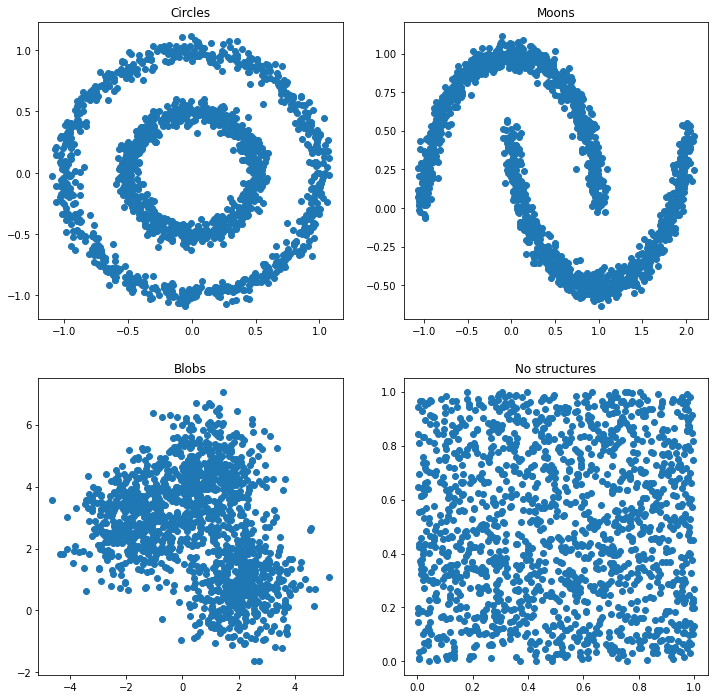

In [120]:
plt.figure(figsize=(12, 12))
plot_data(circles, 221, 'Circles')
plot_data(moons, 222, 'Moons')
plot_data(blobs, 223, 'Blobs')
plot_data(no_structures, 224, 'No structures')

In [121]:
def fit_predict_plot(model, dataset, position, title):
    X, y = dataset
    model.fit(X)
    if hasattr(model, 'labels_'):
        labels = model.labels_.astype(np.int)
    else:
        labels = model.predict(X)

    colors = np.array(['#30A9DE', '#E53A40', '#090707', '#A593E0', '#F6B352', '#519D92', '#D81159', '8CD790', '#353866'])
    ax = plt.subplot(position)
    ax.set_title(title)
    ax.scatter(X[:, 0], X[:, 1], color = colors[labels])

# K-평균균 (K-Means)

- n개의 등분산 그룹으로 군집화
- 제곱합 함수를 최소화
- 군집화 개수를 지정해야한다
- 각 군집C의 평균 Muj를 중심점이라고 함
- 중심점을 찾는 것이 목표

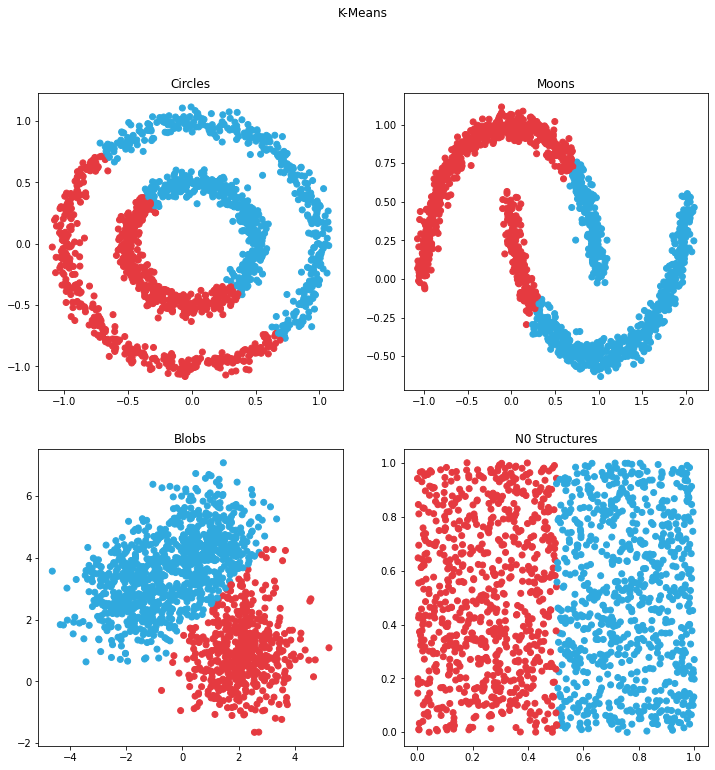

In [122]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('K-Means')

fit_predict_plot(cluster.KMeans(n_clusters=2, random_state=random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.KMeans(n_clusters=2, random_state=random_state), moons, 222, 'Moons')
fit_predict_plot(cluster.KMeans(n_clusters=2, random_state=random_state), blobs, 223, 'Blobs')
fit_predict_plot(cluster.KMeans(n_clusters=2, random_state=random_state), no_structures, 224, 'N0 Structures')

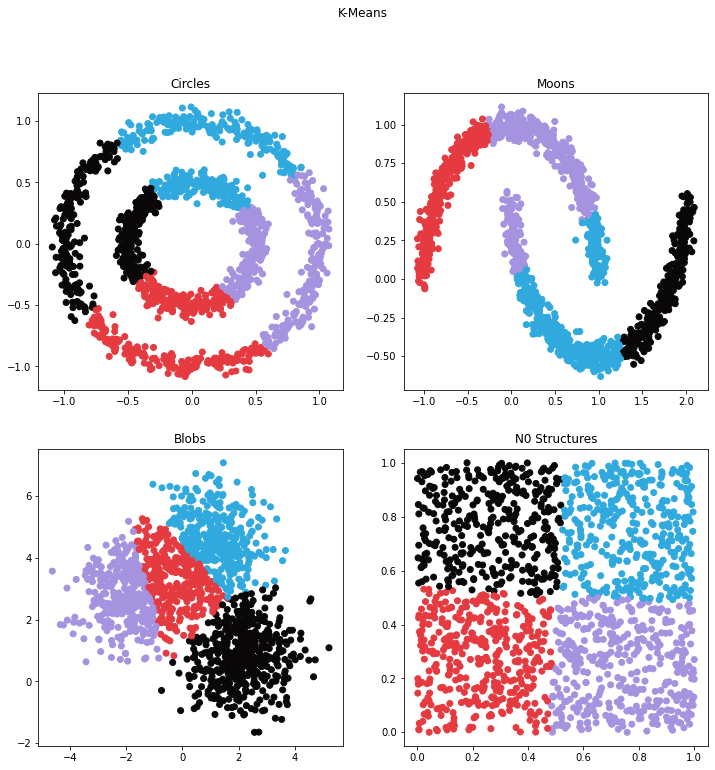

In [123]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('K-Means')

fit_predict_plot(cluster.KMeans(n_clusters=4, random_state=random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.KMeans(n_clusters=4, random_state=random_state), moons, 222, 'Moons')
fit_predict_plot(cluster.KMeans(n_clusters=4, random_state=random_state), blobs, 223, 'Blobs')
fit_predict_plot(cluster.KMeans(n_clusters=4, random_state=random_state), no_structures, 224, 'N0 Structures')

IRIS

In [124]:
from sklearn.datasets import load_iris

iris = load_iris()

model = cluster.KMeans(n_clusters=3)
model.fit(iris.data)
predict = model.predict(iris.data)

idx = np.where(predict == 0)
print(iris.target[idx])
idx = np.where(predict == 1)
print(iris.target[idx])
idx = np.where(predict == 2)
print(iris.target[idx])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


# 미니 배치 K-평균 (Mini Batch K-Mean)
- 배치 처리를 통해 계싼 시간을 줄인 K-평균
- K-평균과 다른 결과가 나올 수 있다.

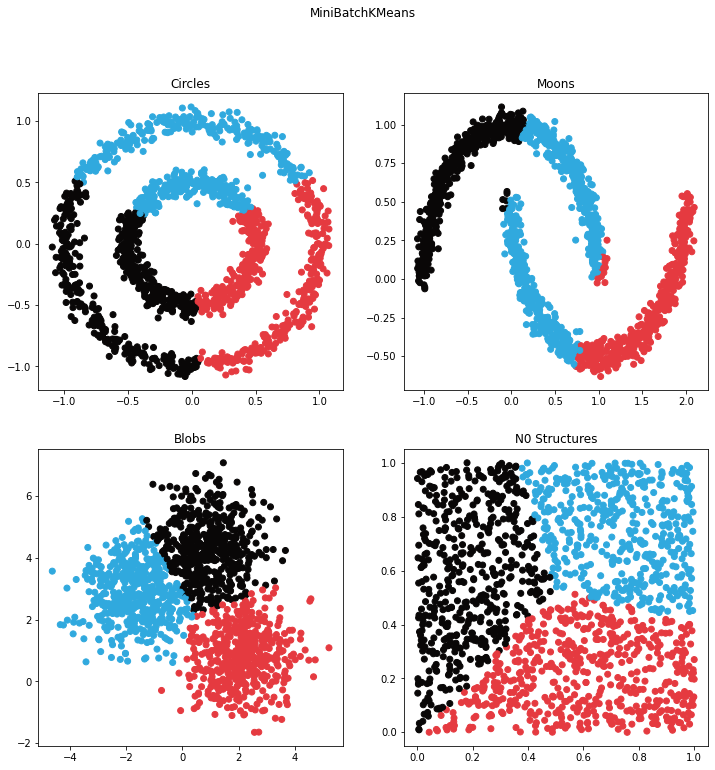

In [125]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('MiniBatchKMeans')

fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=3, random_state=random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=3, random_state=random_state), moons, 222, 'Moons')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=3, random_state=random_state), blobs, 223, 'Blobs')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=3, random_state=random_state), no_structures, 224, 'N0 Structures')

# Affinity Propagation

- 샘플 쌍끼리 메시지를 보내 군집을 생성
- 샘플을 대표하는 적절한 예를 찾을 때까지 반복
- 군집 개수를 자동으로 정함

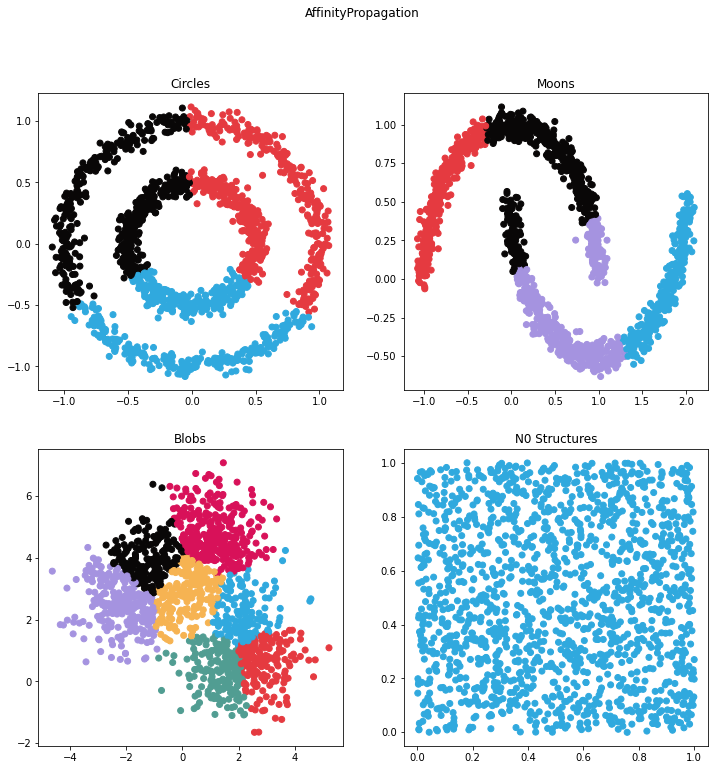

In [126]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('AffinityPropagation')

fit_predict_plot(cluster.AffinityPropagation(damping=.9, preference=-200), circles, 221, 'Circles')
fit_predict_plot(cluster.AffinityPropagation(damping=.9, preference=-200), moons, 222, 'Moons')
fit_predict_plot(cluster.AffinityPropagation(damping=.9, preference=-200), blobs, 223, 'Blobs')
fit_predict_plot(cluster.AffinityPropagation(damping=.9, preference=-200), no_structures, 224, 'N0 Structures')

# Mean Shift
- 중심점 후보를 정해진 구역 내 평균으로 업데이트

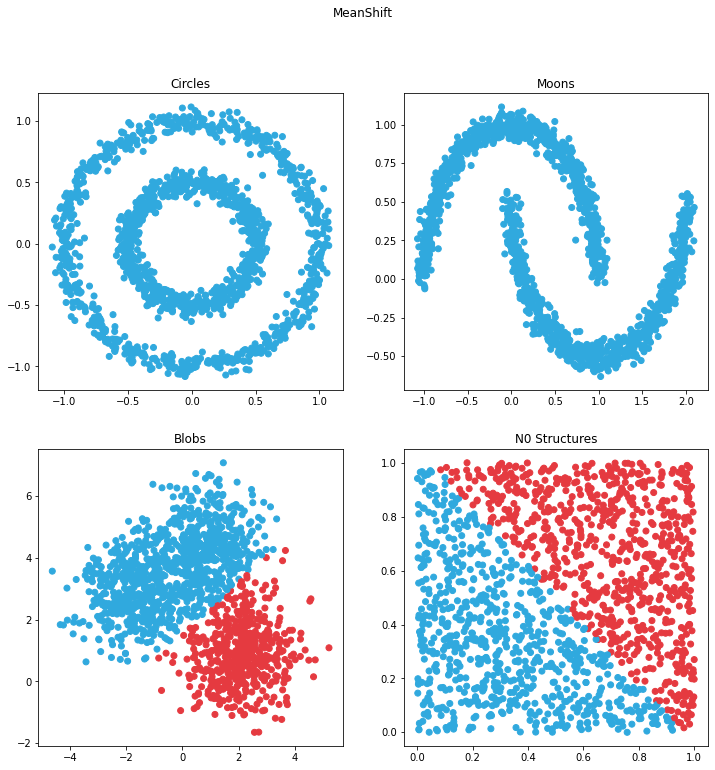

In [127]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('MeanShift')

fit_predict_plot(cluster.MeanShift(), circles, 221, 'Circles')
fit_predict_plot(cluster.MeanShift(), moons, 222, 'Moons')
fit_predict_plot(cluster.MeanShift(), blobs, 223, 'Blobs')
fit_predict_plot(cluster.MeanShift(), no_structures, 224, 'N0 Structures')

# 스펙트럼 군집화 (Spectral Clustering)

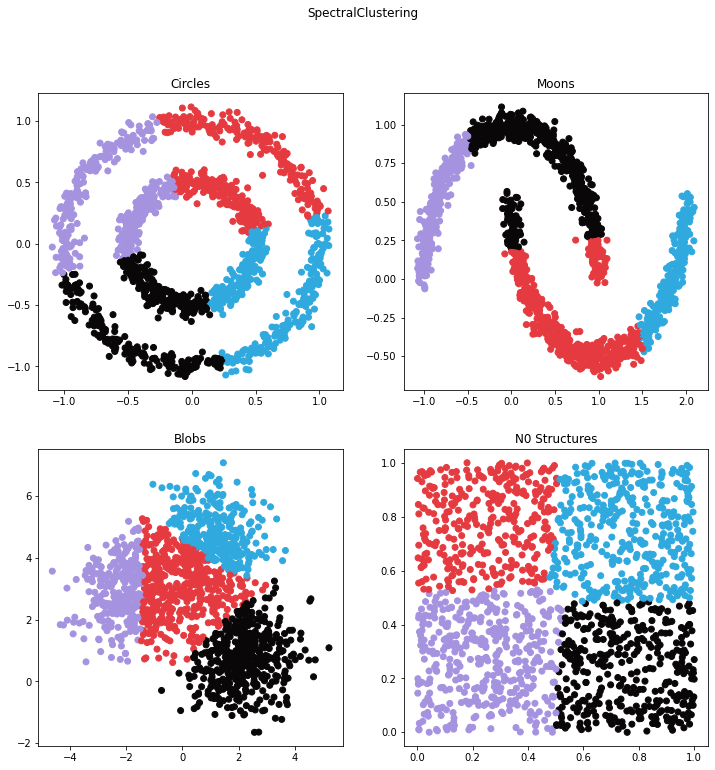

In [129]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('SpectralClustering')

fit_predict_plot(cluster.SpectralClustering(n_clusters=4, random_state=random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.SpectralClustering(n_clusters=4, random_state=random_state), moons, 222, 'Moons')
fit_predict_plot(cluster.SpectralClustering(n_clusters=4, random_state=random_state), blobs, 223, 'Blobs')
fit_predict_plot(cluster.SpectralClustering(n_clusters=4, random_state=random_state), no_structures, 224, 'N0 Structures')

유방암 데이터 군집화

In [133]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

model = cluster.SpectralClustering(n_clusters=2, eigen_solver='arpack', affinity='nearest_neighbors')
model.fit(cancer.data)
predict = model.labels_

idx = np.where(predict == 0)
print(cancer.target[idx])
idx = np.where(predict == 1)
print(cancer.target[idx])

[0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1
 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0
 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0
 1 

# 계층 군집화

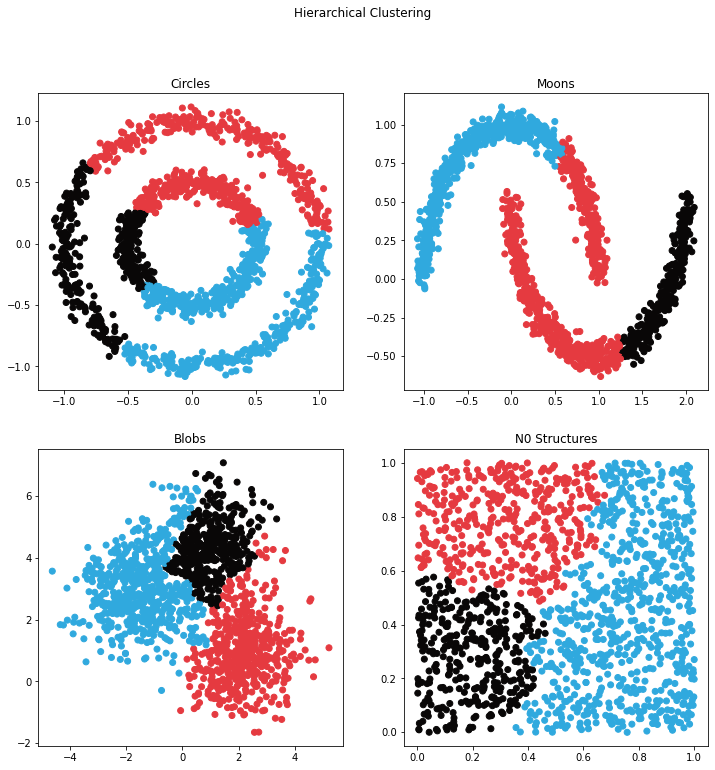

In [135]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Hierarchical Clustering')

fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=3, linkage='ward'), circles, 221, 'Circles')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=3, linkage='ward'), moons, 222, 'Moons')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=3, linkage='ward'), blobs, 223, 'Blobs')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=3, linkage='ward'), no_structures, 224, 'N0 Structures')

Wine

In [138]:
from sklearn.datasets import load_wine

wine = load_wine()

model = cluster.AgglomerativeClustering(n_clusters=3)
model.fit(wine.data)
predict = model.labels_

idx = np.where(predict == 0)
print(cancer.target[idx])
idx = np.where(predict == 1)
print(cancer.target[idx])
idx = np.where(predict == 2)
print(cancer.target[idx])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1
 1 1 1 0 0 1 0 0 1 0 0]
[1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0]
[0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1]


# DBSCAN(Density-Based Spatial Clustering of Applications with Noise)

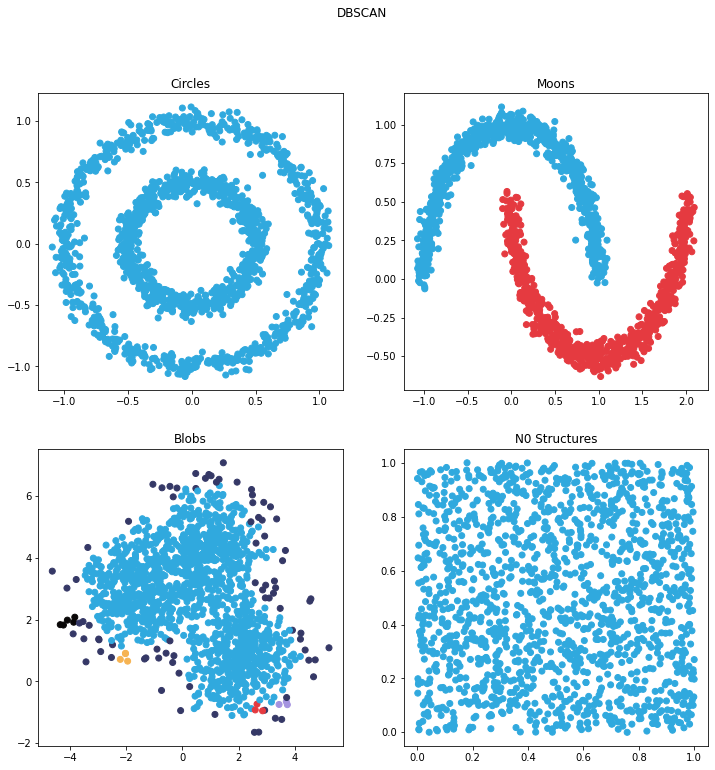

In [139]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('DBSCAN')

fit_predict_plot(cluster.DBSCAN(eps=.3), circles, 221, 'Circles')
fit_predict_plot(cluster.DBSCAN(eps=.3), moons, 222, 'Moons')
fit_predict_plot(cluster.DBSCAN(eps=.3), blobs, 223, 'Blobs')
fit_predict_plot(cluster.DBSCAN(eps=.3), no_structures, 224, 'N0 Structures')

# OPTICS (Ordering Points To Identify the Clustering Structure)

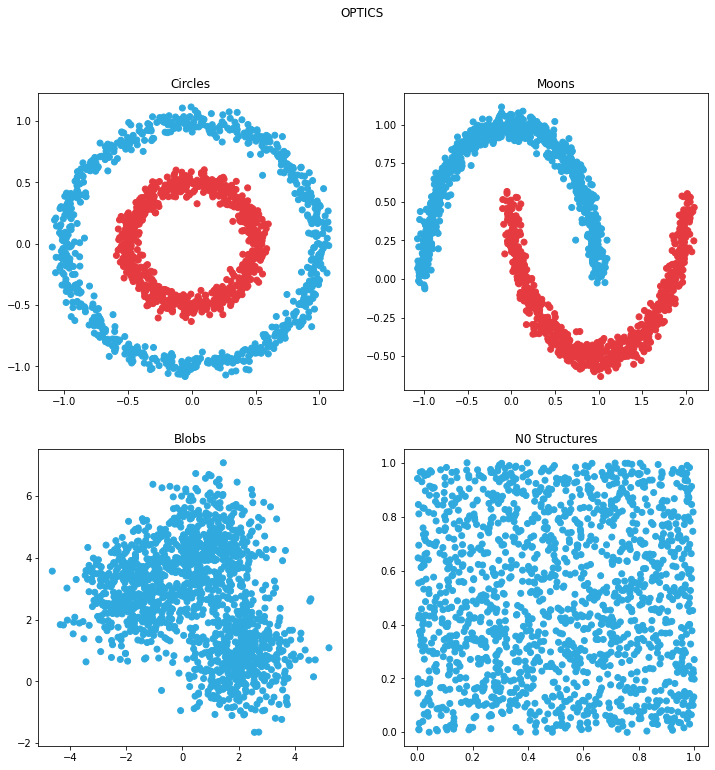

In [140]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('OPTICS')

fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1), circles, 221, 'Circles')
fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1), moons, 222, 'Moons')
fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1), blobs, 223, 'Blobs')
fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1), no_structures, 224, 'N0 Structures')

# Birch (Balanced iterative reducing and clustering using hierarchies)

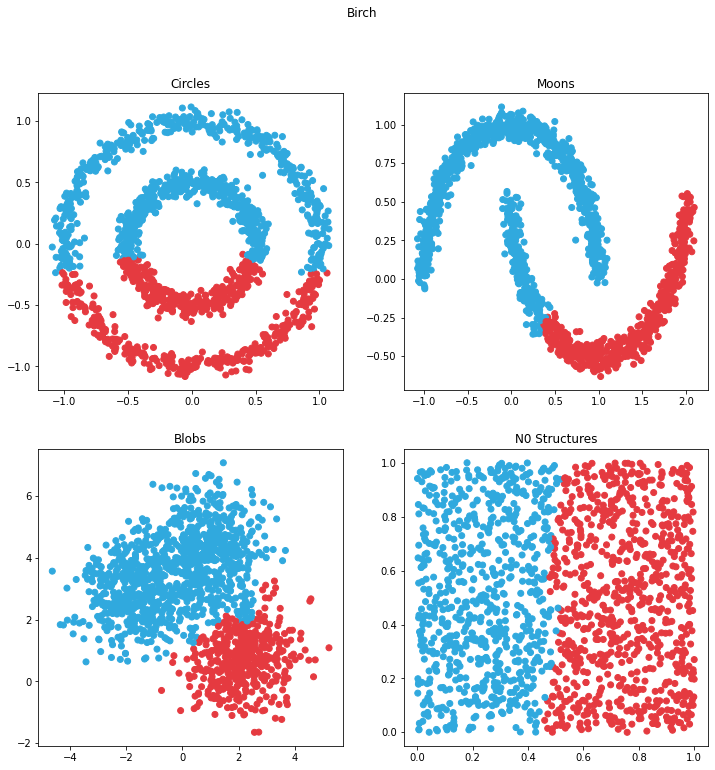

In [141]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Birch')

fit_predict_plot(cluster.Birch(n_clusters=2, threshold=.3), circles, 221, 'Circles')
fit_predict_plot(cluster.Birch(n_clusters=2, threshold=.3), moons, 222, 'Moons')
fit_predict_plot(cluster.Birch(n_clusters=2, threshold=.3), blobs, 223, 'Blobs')
fit_predict_plot(cluster.Birch(n_clusters=2, threshold=.3), no_structures, 224, 'N0 Structures')

# 손글씨 데이터 군집화

In [143]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [144]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [145]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [146]:
X = digits.data.reshape(-1, 8, 8)
y = digits.target

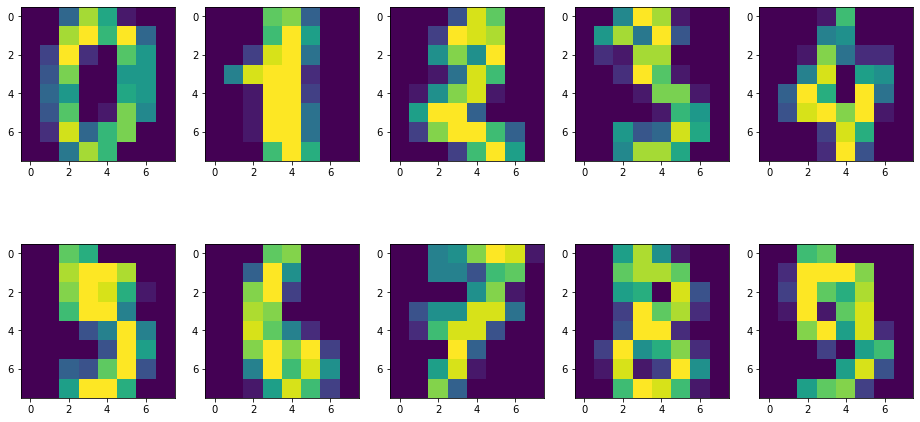

In [150]:
plt.figure(figsize=(16, 8))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X[i])

K-Means

In [156]:
kmeans = cluster.KMeans(n_clusters=10)
kmeans.fit(digits.data)
predict = kmeans.predict(digits.data)

for i in range(10):
    idx = np.where(predict==i)
    real_class = digits.target[idx]
    print('Cluster {} : {}'.format(i+1, real_class))

Cluster 1 : [3 5 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 3 9 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 3 9 9 3 3 3 9 9 9 9 3 5 3 3 9 9 5 9 9 3 3 3 3 3 3 3 3 5 3 5 8 3 3 9 3 9
 3 9 9 5 5 9 9 3 8 3 3 3 3 9 5 9 3 3 9 3 3 9 9 9 9 3 9 3 5 9 3 5 9 5 5 9 9
 3 5 3 3 3 3 9 9 5 3 3 9 3 5 3 9 9 5 9 9 3 3 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9
 3 9 9 9 8 9 8 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 5 9 3 5 9 9 5 5 5 9 9 3
 5 8 3 3 3 3 9 5 9 5 3 3 3 9 8 3 3 9 5 5 9 5 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3
 3 9 2 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9
 3 5 9 3 9 3 9 9 9 9 3 2 2 2 2 3 3 3 3 9 9 2 3 3 3 9 3 3 9 2 9 9 3 8 9 3 5
 9 3 5 8 9 9 5 5 5 9 9 3 5 3 3 3 3 9 5 9 8 3 3 3 9 8 3 5 3 9 5 9 9 9 3 2 3
 3 2 9 2 3 3 3 3 3 9 2 9 3 9 9 9 9 9 9 3 9 9 3 3 9 5 3 9 5 9 5 9 9]
Cluster 2 : [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4

Cluster : 1


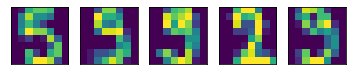

Cluster : 2


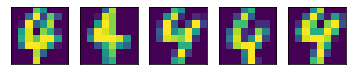

Cluster : 3


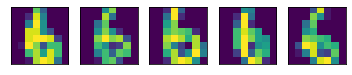

Cluster : 4


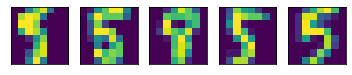

Cluster : 5


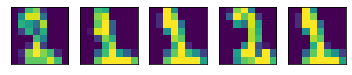

Cluster : 6


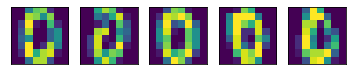

Cluster : 7


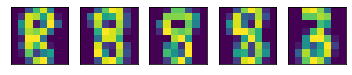

Cluster : 8


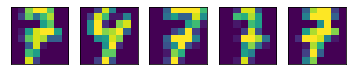

Cluster : 9


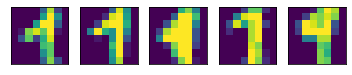

Cluster : 10


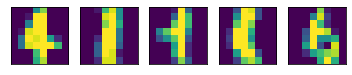

In [158]:
for i in range(10):
    idx = np.where(predict == i)[0]
    choice_idx = np.random.choice(idx, size=5)
    choice_image = X[choice_idx]

    k = 1

    print('Cluster : {}'.format(i+1))
    for image in choice_image:
        plt.subplot(1, 5, k)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image)
        k += 1
    
    plt.show()

Spectral Clustering

In [161]:
spectral = cluster.SpectralClustering(n_clusters=10, eigen_solver='arpack', affinity='nearest_neighbors')
spectral.fit(digits.data)
predict = spectral.labels_

for i in range(10):
    idx = np.where(predict==i)
    real_class = digits.target[idx]
    print('Cluster {} : {}'.format(i+1, real_class))

Cluster 1 : [6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 5 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
Cluster 2 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Cluster 3 : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 9 9 1 1 1 1 1 1 1 1 1 1 1
 1 9 9 9 9 9 9 9 9 9 9 9 9 9 8 8 1 1 1 1 1 1 1 1 1 1 1 1 8 1 1 1 1 1 1 1 1
 9 9 9 9 9 9]
Cluster 4 : [3 5 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 3 9 3 9 9 9 9 3 9 3 9

Cluster : 1


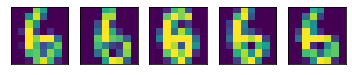

Cluster : 2


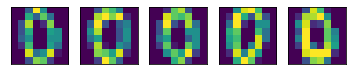

Cluster : 3


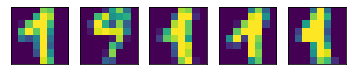

Cluster : 4


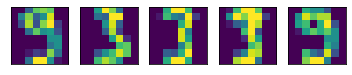

Cluster : 5


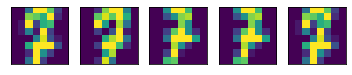

Cluster : 6


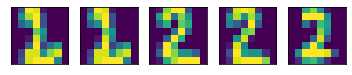

Cluster : 7


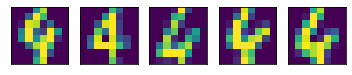

Cluster : 8


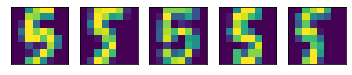

Cluster : 9


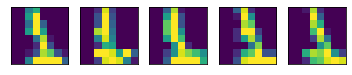

Cluster : 10


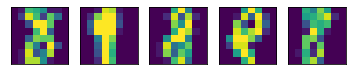

In [162]:
for i in range(10):
    idx = np.where(predict == i)[0]
    choice_idx = np.random.choice(idx, size=5)
    choice_image = X[choice_idx]

    k = 1

    print('Cluster : {}'.format(i+1))
    for image in choice_image:
        plt.subplot(1, 5, k)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image)
        k += 1
    
    plt.show()

Hierarchical Clustering

In [164]:
hierarchical = cluster.AgglomerativeClustering(n_clusters=10, linkage='ward')
hierarchical.fit(digits.data)
predict = hierarchical.labels_

for i in range(10):
    idx = np.where(predict==i)
    real_class = digits.target[idx]
    print('Cluster {} : {}'.format(i+1, real_class))

Cluster 1 : [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 5 5 5 5 5 5]
Cluster 2 : [3 5 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 3 9 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 3 9 9 3 3 3 9 3 3 9 9 9 3 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9
 9 5 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 3 3 3 3 3 9 9 3
 3 3 9 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9
 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9
 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 9 3 3 9 9 8 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9
 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 3 3 9 3 3 3 3 3 9
 9 3 9 9

Cluster : 1


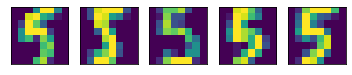

Cluster : 2


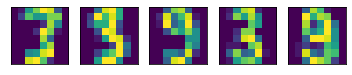

Cluster : 3


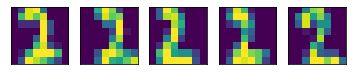

Cluster : 4


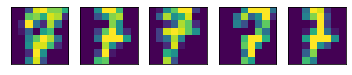

Cluster : 5


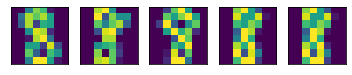

Cluster : 6


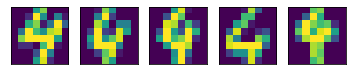

Cluster : 7


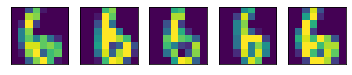

Cluster : 8


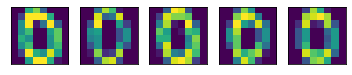

Cluster : 9


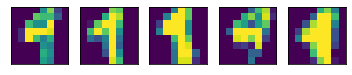

Cluster : 10


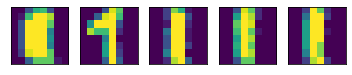

In [165]:
for i in range(10):
    idx = np.where(predict == i)[0]
    choice_idx = np.random.choice(idx, size=5)
    choice_image = X[choice_idx]

    k = 1

    print('Cluster : {}'.format(i+1))
    for image in choice_image:
        plt.subplot(1, 5, k)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image)
        k += 1
    
    plt.show()

Birch

In [171]:
birch = cluster.Birch(n_clusters=10, threshold=.3)
birch.fit(digits.data)
predict = birch.labels_

for i in range(10):
    idx = np.where(predict==i)
    real_class = digits.target[idx]
    print('Cluster {} : {}'.format(i+1, real_class))

Cluster 1 : [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 5 5 5 5 5 5]
Cluster 2 : [3 5 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 3 9 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 3 9 9 3 3 3 9 3 3 9 9 9 3 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9
 9 5 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 3 3 3 3 3 9 9 3
 3 3 9 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9
 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9
 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 9 3 3 9 9 8 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9
 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 3 3 9 3 3 3 3 3 9
 9 3 9 9

Cluster : 1


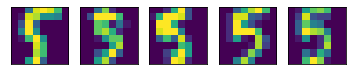

Cluster : 2


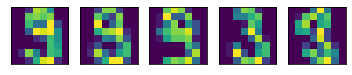

Cluster : 3


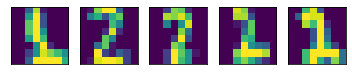

Cluster : 4


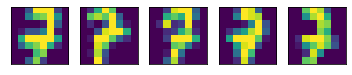

Cluster : 5


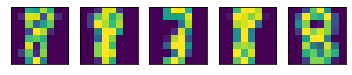

Cluster : 6


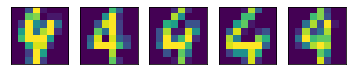

Cluster : 7


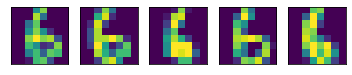

Cluster : 8


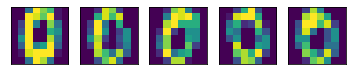

Cluster : 9


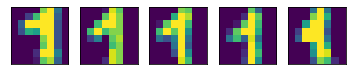

Cluster : 10


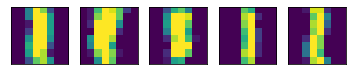

In [172]:
for i in range(10):
    idx = np.where(predict == i)[0]
    choice_idx = np.random.choice(idx, size=5)
    choice_image = X[choice_idx]

    k = 1

    print('Cluster : {}'.format(i+1))
    for image in choice_image:
        plt.subplot(1, 5, k)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image)
        k += 1
    
    plt.show()